# Feature Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, stats

In [2]:
import z_dependancy as z_dep

%matplotlib

In [3]:
%matplotlib inline

In [4]:
plt.rc('font', size=20)

## Signal Generation

In [5]:
fs = 1000;                 
T = 3;
t = np.arange(1/fs,T+1/fs,1/fs)
w = 10;

v_n = 2*np.cos(2*np.pi*w*t); 
v_f = np.copy(v_n);

f_start = 500;

for n in range(0,T):
  v_f[f_start+(n-1)*fs-1] = v_f[f_start+(n-1)*fs-1]+1;

v_n = v_n+0.1*np.random.randn(np.size(v_n));
v_f = v_f+0.1*np.random.randn(np.size(v_n));

(-3, 3)

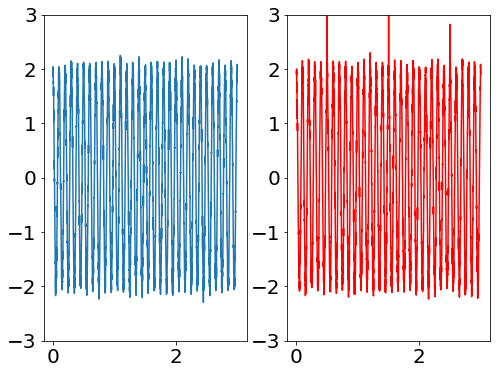

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(121);plt.plot(t,v_n);plt.ylim([-3, 3])
plt.subplot(122);plt.plot(t,v_f,'r');plt.ylim([-3, 3])

## 주파수 분석해 보기

In [7]:
f_n, A_n = z_dep.z_fft_simple(v_n,fs);
f_f, A_f= z_dep.z_fft_simple(v_f,fs);

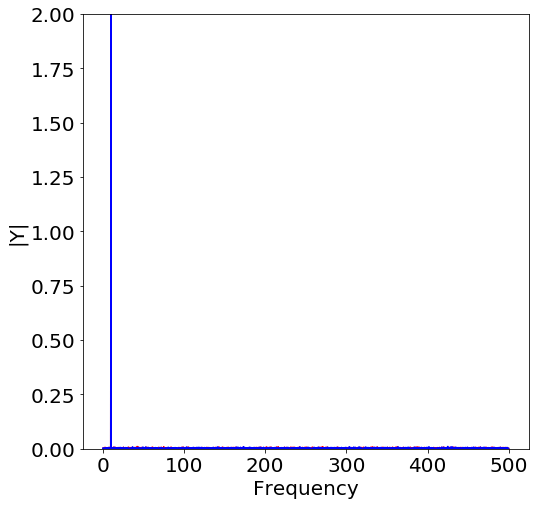

In [8]:
plt.figure(figsize=(8,8))
plt.plot(f_f,A_f,'r');
plt.plot(f_n, A_n, 'b');
plt.xlabel('Frequency');plt.ylabel('|Y|')
# plt.xlim([0, 50])
plt.ylim([0,2])
plt.show()

## Raw Data로 Feature 추출해보기

In [9]:
band=np.matrix('8,12;12,50;50,400')
print(band)

[[  8  12]
 [ 12  50]
 [ 50 400]]


In [10]:
feature_n, feature_name = z_dep.z_feature_simple(v_n, fs, band);
feature_f, feature_name_f = z_dep.z_feature_simple(v_f, fs, band);

In [11]:
feature_ratio = [i / j for i, j in zip(feature_f, feature_n)]

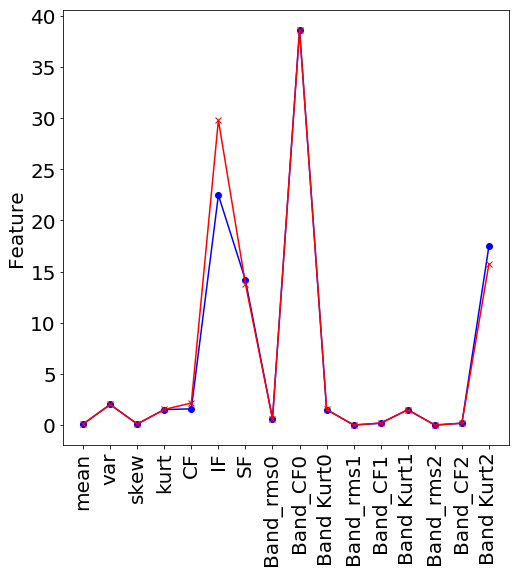

In [12]:
plt.figure(figsize=(8,8))
plt.plot(feature_n,'-bo');
plt.plot(feature_f,'-rx')
plt.xticks(np.arange(0,np.size(feature_name)),feature_name,rotation='vertical');
plt.ylabel('Feature')
plt.show()

Text(0, 0.5, 'Feature ratio')

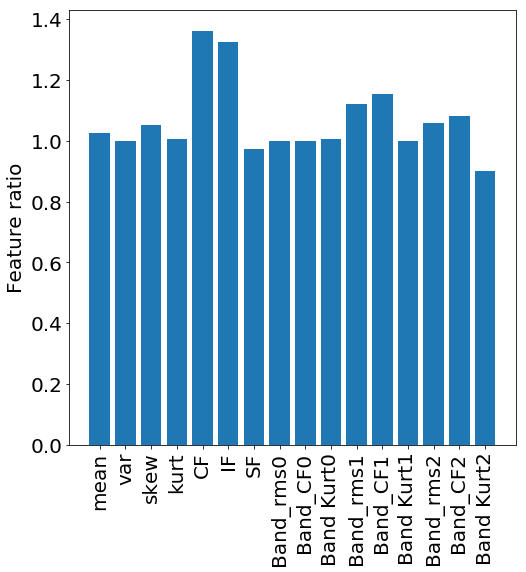

In [13]:
plt.figure(figsize=(8,8))
plt.bar(np.arange(1,np.size(feature_name)+1), feature_ratio)
plt.xticks(np.arange(1,np.size(feature_name)+1),feature_name,rotation='vertical');
plt.ylabel('Feature ratio')

## Stop Band Data로 Feature 추출해보기

In [14]:
Fn=fs/2;
n=10;

In [15]:
Wn=15;ftype='high';

In [16]:
[z,p,k] = signal.butter(n,Wn/Fn,btype=ftype,output='zpk')

In [17]:
sos = signal.zpk2sos(z,p,k); #g is same as k
sos[0,0:3]=sos[0,0:3]/k 

In [18]:
v_n_filter = signal.sosfilt(sos,v_n)*k
v_f_filter = signal.sosfilt(sos,v_f)*k

v_n_filter[:int(fs/10)] = 0;
v_f_filter[:int(fs/10)] = 0;

(-3, 3)

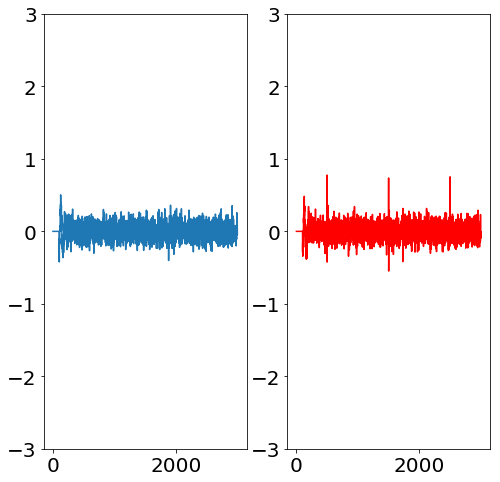

In [19]:
plt.figure(figsize=(8,8))
plt.subplot(121);plt.plot(v_n_filter);plt.ylim([-3,3])
plt.subplot(122);plt.plot(v_f_filter,'r');plt.ylim([-3,3])

## 주파수 분석해보기

In [20]:
f_n, A_n = z_dep.z_fft_simple(v_n_filter,fs)
f_f, A_f = z_dep.z_fft_simple(v_f_filter,fs)

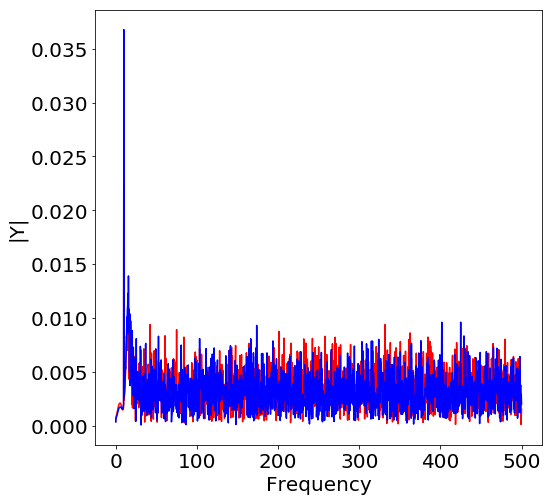

In [21]:
plt.figure(figsize=(8,8))
plt.plot(f_f,A_f,'r')
plt.plot(f_n, A_n, 'b')
plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.show()

## Feature 정의하기

In [22]:
band=np.matrix('8,12;12,50;50,450')
print(band)
feature_n, feature_name = z_dep.z_feature_simple(v_n_filter, fs, band)
feature_f, feature_name_f = z_dep.z_feature_simple(v_f_filter, fs, band)
feature_ratio = [i / j for i, j in zip(feature_f, feature_n)]


[[  8  12]
 [ 12  50]
 [ 50 450]]


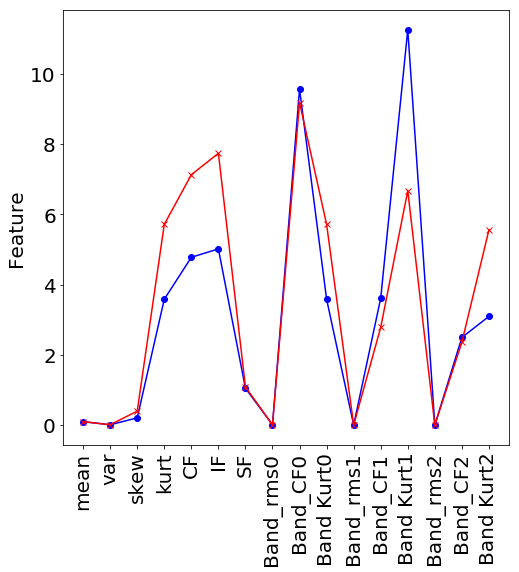

In [23]:
plt.figure(figsize=(8,8))
plt.plot(feature_n,'-bo')
plt.plot(feature_f,'-rx')
plt.xticks(np.arange(0,np.size(feature_name)),feature_name,rotation='vertical');
plt.ylabel('Feature')
plt.show()

Text(0, 0.5, 'Feature ratio')

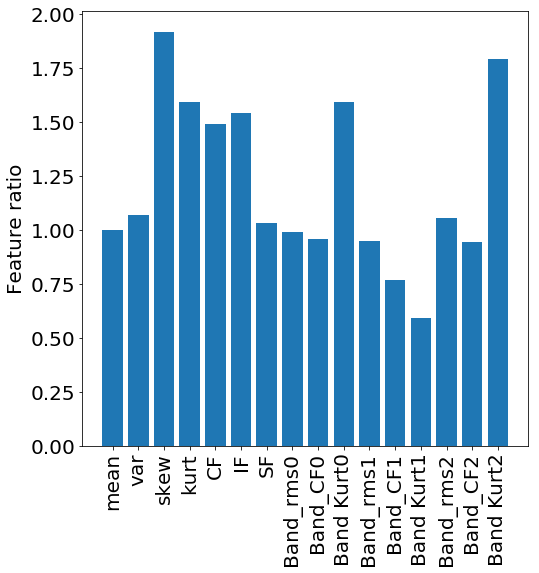

In [24]:
plt.figure(figsize=(8,8))
plt.bar(np.arange(1,np.size(feature_name)+1), feature_ratio)
plt.xticks(np.arange(1,np.size(feature_name)+1),feature_name,rotation='vertical');
plt.ylabel('Feature ratio')